#### Zillow Dataset

In [26]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import pandas as pd
import numpy as np
import os
from env import host, user, password
import wrangle_zillow
from sklearn.model_selection import train_test_split

Create a python script or jupyter notebook named `explore_zillow` and do the following:

In [3]:
df = wrangle_zillow.wrangle_zillow()

In [4]:
def fips_labels(x):
    if x['fips'] == 6037:
        return 'Los Angeles County'
    elif x['fips'] == 6059:
        return 'Orange County'
    elif x['fips'] == 6111:
        return 'Ventura County'

In [5]:
df['county'] = df.apply(lambda x: fips_labels(x), axis=1)

In [6]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,parcelid,logerror,transactiondate,county
336,337,17051828,4.0,4.0,4.0,4969.0,4969.0,6111.0,4.0,34433200.0,...,2228473.0,2016.0,1448761.0,24556.86,6.111001e+13,337,14688177,0.006783,2017-01-03,Ventura County
337,338,17052152,2.0,3.0,2.0,1800.0,1800.0,6111.0,2.0,34464778.0,...,794940.0,2016.0,475137.0,8571.20,6.111001e+13,338,10930942,0.054386,2017-01-03,Ventura County
338,339,17052992,1.0,2.0,1.0,780.0,780.0,6111.0,1.0,34450686.0,...,88731.0,2016.0,18500.0,1652.36,6.111001e+13,339,17246711,0.011061,2017-01-03,Ventura County
339,340,17053038,2.0,2.0,2.0,1250.0,1250.0,6111.0,2.0,34448639.0,...,233424.0,2016.0,153849.0,3191.16,6.111001e+13,340,12559816,0.061977,2017-01-03,Ventura County
340,341,17053061,1.0,2.0,1.0,1404.0,1404.0,6111.0,1.0,34450089.0,...,313844.0,2016.0,213991.0,3987.00,6.111001e+13,341,14673239,0.010089,2017-01-03,Ventura County


1. Ask at least 5 questions about the data, keeping in mind that your target variable is `logerror`. e.g. Is `logerror` significantly different for properties in LA County vs Orange County vs Ventura County?
    1. What is the distrinution of each variable?
    2. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
    3. Is there a relationship between log error and tax amount?
    4. Is there a relationship between log error and bedroomcnt?
    5. If we control for taxvaluedollarcnt (by 10,000s), does log error differ across bathroomcnt?

In [7]:
cols_to_drop = ['id', 'parcelid', 'fips', 'propertycountylandusecode', 'propertylandusetypeid', 
                'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidcounty',
                'regionidzip']

2. Answer those questions through a mix of statistical tests and visualizations.

<Figure size 1152x648 with 0 Axes>

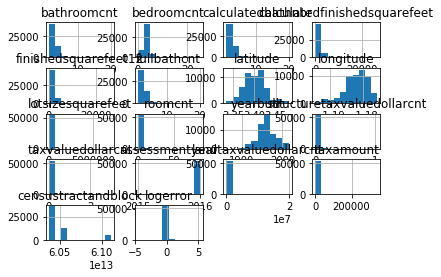

In [8]:
# What is the distrinution of each variable?
plt.figure(figsize=(16,9))
df.drop(columns=cols_to_drop).hist()
plt.tight_layout()

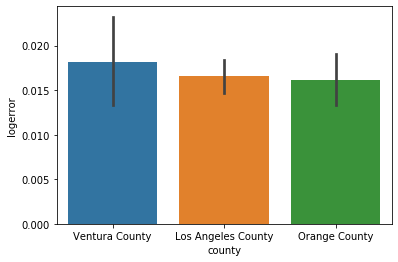

In [9]:
# Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
sns.barplot(x=df.county, y=df.logerror)

In [18]:
la_county = df[df.county == 'Los Angeles County'].logerror
ventura = df[df.county == 'Ventura County'].logerror
orange = df[df.county == 'Orange County'].logerror

In [50]:
null_a = 'the mean logerror for all counties are equal'
alpha = .05

print(la_county.var())
print(ventura.var())
print(orange.var())

0.028992834547926484
0.03397405141077895
0.028643643092232083


In [51]:
f, p = stats.f_oneway(la_county, ventura, orange)
f, p

(0.25297889854768385, 0.7764851874975836)

In [52]:
if p < alpha:
    print("We reject", null_a)
else:
    print("We fail to reject", null_a)

We fail to reject the mean logerror for all counties are equal


**Conclusion: the mean logerror for all counties are NOT equal. We can continue to look deeper by running a 2-sample t-test for each combination of county**

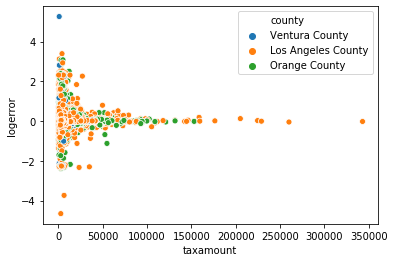

In [32]:
# Is there a relationship between log error and tax amount?
sns.scatterplot(x=df.taxamount, y=df.logerror, hue=df.county)

In [57]:
#sns.heatmap(df.corr())

In [45]:
null_c = 'there is no relationship between log error and tax amount'

x=df.taxamount
y=df.logerror

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = -0.0030805997824835864
p = 0.47422615095510895


In [48]:
if p < alpha:
    print("We reject that", null_c)
else:
    print("We fail to reject that", null_c)

We fail to reject that there is no relationship between log error and tax amount


**Conclusion: There is no linear relationship between log error and tax amount**

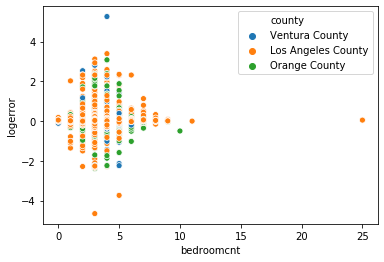

In [38]:
# Is there a relationship between log error and bedroomcnt?
sns.scatterplot(x=df.bedroomcnt, y=df.logerror, hue=df.county)

In [ ]:
# If we control for taxvaluedollarcnt (by 10,000s), does log error differ across bathroomcnt?
pd.cut

In your exploration, be sure you include the following:
1. a plot with at least 3 dimensions, such as x, y, and color.

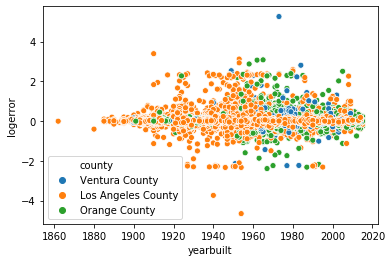

In [16]:
sns.scatterplot(y=df.logerror, x=df.yearbuilt, hue=df.county)

2. at least 3 different **types** of plots (like box, scatter, bar, ...)

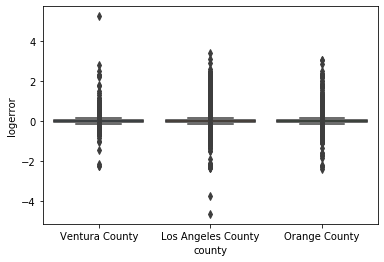

In [17]:
sns.boxplot(df.county, df.logerror)

3. at least 2 statistical tests.

4. document takeaways/conclusions after each question is addressed.

**Bonus**:
Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.